In [4]:
import folium
import pandas as pd

df = pd.read_csv('assets/BinSize_d400.csv')
station_locations_by_hash = df[df['hash'] == 'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89']

lons = station_locations_by_hash['LONGITUDE'].tolist()
lats = station_locations_by_hash['LATITUDE'].tolist()

my_map = folium.Map(location = [lats[0], lons[0]], height = 500,  zoom_start = 9)
for lat, lon in zip(lats, lons):
    folium.Marker([lat, lon]).add_to(my_map)

display(my_map)

### transforming data to celcius and extracting all of the rows which have minimum or maximum temperatures

In [7]:
import pandas as pd
df = pd.read_csv('assets/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
df.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [8]:
df['Data_Value'] = df['Data_Value']/10 # conversion to celcius
df.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,2.2
1,USC00208972,2009-04-29,TMIN,5.6
2,USC00200032,2008-05-26,TMAX,27.8
3,USC00205563,2005-11-11,TMAX,13.9
4,USC00200230,2014-02-27,TMAX,-10.6


In [10]:
tmin = df[df['Element'] == 'TMIN']
tmax = df[df['Element'] == 'TMAX']
display(tmax)
display(tmin)

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,2.2
2,USC00200032,2008-05-26,TMAX,27.8
3,USC00205563,2005-11-11,TMAX,13.9
4,USC00200230,2014-02-27,TMAX,-10.6
5,USW00014833,2010-10-01,TMAX,19.4
...,...,...,...,...
165074,USW00094889,2009-07-09,TMAX,26.1
165076,USC00205050,2013-09-29,TMAX,26.1
165080,USC00205822,2015-06-09,TMAX,25.6
165081,USC00205822,2009-10-06,TMAX,16.7


,ID,Date,Element,Data_Value
1,USC00208972,2009-04-29,TMIN,5.6
6,USC00207308,2010-06-29,TMIN,14.4
8,USW00004848,2007-12-14,TMIN,-1.6
11,USC00205822,2008-05-29,TMIN,2.8
12,USC00203712,2008-10-17,TMIN,1.7
...,...,...,...,...
165077,USC00205050,2014-07-14,TMIN,17.2
165078,USC00200032,2011-06-27,TMIN,14.4
165079,USC00202308,2005-03-02,TMIN,-6.7
165083,USC00200230,2006-11-29,TMIN,11.7


### visualizing data between 2005 & 2014

In [15]:
tmin['Date'] = pd.to_datetime(tmin['Date'])
tmax['Date'] = pd.to_datetime(tmax['Date'])

# removing february 29
tmin = tmin[~((tmin['Date'].dt.month == 2) & (tmin['Date'].dt.day == 29))]
tmax = tmax[~((tmax['Date'].dt.month == 2) & (tmax['Date'].dt.day == 29))]

# splitting data from 2005 to 2014 & 2015

# adding a year column
tmin['Year'] = tmin['Date'].dt.year
tmax['Year'] = tmax['Date'].dt.year

display(tmax)
display(tmin)

tmin_decade = tmin[(tmin['Year'] >= 2005) & (tmin['Year'] <= 2014)]
tmax_decade = tmax[(tmax['Year'] >= 2005) & (tmax['Year'] <= 2014)]

display(tmax_decade)
display(tmin_decade)

tmin_2015 = tmin[tmin['Year'] == 2015]
tmax_2015 = tmax[tmax['Year'] == 2015]

display(tmax_2015)
display(tmin_2015)

# using month-day to group by the same day across all years
tmin_decade['Month-Day'] = tmin_decade['Date'].dt.strftime('%m-%d')
tmax_decade['Month-Day'] = tmax_decade['Date'].dt.strftime('%m-%d')

display(tmax_decade)
display(tmin_decade)

tmin_2015['Month-Day'] = tmin_2015['Date'].dt.strftime('%m-%d')
tmax_2015['Month-Day'] = tmax_2015['Date'].dt.strftime('%m-%d')

display(tmax_2015)
display(tmin_2015)

,ID,Date,Element,Data_Value,Year
0,USW00094889,2014-11-12,TMAX,2.2,2014
2,USC00200032,2008-05-26,TMAX,27.8,2008
3,USC00205563,2005-11-11,TMAX,13.9,2005
4,USC00200230,2014-02-27,TMAX,-10.6,2014
5,USW00014833,2010-10-01,TMAX,19.4,2010
...,...,...,...,...,...
165074,USW00094889,2009-07-09,TMAX,26.1,2009
165076,USC00205050,2013-09-29,TMAX,26.1,2013
165080,USC00205822,2015-06-09,TMAX,25.6,2015
165081,USC00205822,2009-10-06,TMAX,16.7,2009


,ID,Date,Element,Data_Value,Year
1,USC00208972,2009-04-29,TMIN,5.6,2009
6,USC00207308,2010-06-29,TMIN,14.4,2010
8,USW00004848,2007-12-14,TMIN,-1.6,2007
11,USC00205822,2008-05-29,TMIN,2.8,2008
12,USC00203712,2008-10-17,TMIN,1.7,2008
...,...,...,...,...,...
165077,USC00205050,2014-07-14,TMIN,17.2,2014
165078,USC00200032,2011-06-27,TMIN,14.4,2011
165079,USC00202308,2005-03-02,TMIN,-6.7,2005
165083,USC00200230,2006-11-29,TMIN,11.7,2006


,ID,Date,Element,Data_Value,Year
0,USW00094889,2014-11-12,TMAX,2.2,2014
2,USC00200032,2008-05-26,TMAX,27.8,2008
3,USC00205563,2005-11-11,TMAX,13.9,2005
4,USC00200230,2014-02-27,TMAX,-10.6,2014
5,USW00014833,2010-10-01,TMAX,19.4,2010
...,...,...,...,...,...
165073,USC00205563,2005-05-13,TMAX,22.2,2005
165074,USW00094889,2009-07-09,TMAX,26.1,2009
165076,USC00205050,2013-09-29,TMAX,26.1,2013
165081,USC00205822,2009-10-06,TMAX,16.7,2009


,ID,Date,Element,Data_Value,Year
1,USC00208972,2009-04-29,TMIN,5.6,2009
6,USC00207308,2010-06-29,TMIN,14.4,2010
8,USW00004848,2007-12-14,TMIN,-1.6,2007
11,USC00205822,2008-05-29,TMIN,2.8,2008
12,USC00203712,2008-10-17,TMIN,1.7,2008
...,...,...,...,...,...
165077,USC00205050,2014-07-14,TMIN,17.2,2014
165078,USC00200032,2011-06-27,TMIN,14.4,2011
165079,USC00202308,2005-03-02,TMIN,-6.7,2005
165083,USC00200230,2006-11-29,TMIN,11.7,2006


,ID,Date,Element,Data_Value,Year
30,USC00203712,2015-03-17,TMAX,18.9,2015
51,USC00205563,2015-01-03,TMAX,2.2,2015
59,USC00202308,2015-08-30,TMAX,26.1,2015
126,USC00200032,2015-06-06,TMAX,23.3,2015
146,USC00208972,2015-04-09,TMAX,6.7,2015
...,...,...,...,...,...
165007,USC00205451,2015-08-08,TMAX,25.6,2015
165020,USC00205451,2015-10-02,TMAX,18.9,2015
165045,USC00200230,2015-03-10,TMAX,9.4,2015
165056,USC00200228,2015-02-23,TMAX,-1.1,2015


,ID,Date,Element,Data_Value,Year
19,USC00205563,2015-01-03,TMIN,-3.9,2015
34,USC00200032,2015-06-06,TMIN,12.8,2015
46,USW00014833,2015-08-30,TMIN,17.8,2015
50,USC00202308,2015-08-30,TMIN,15.6,2015
72,USC00200230,2015-04-01,TMIN,-1.7,2015
...,...,...,...,...,...
165032,USC00205451,2015-10-02,TMIN,7.2,2015
165038,USC00207312,2015-07-10,TMIN,13.3,2015
165054,USC00208080,2015-02-14,TMIN,-21.1,2015
165059,USC00207312,2015-06-23,TMIN,17.2,2015


/tmp/ipykernel_33303/268139978.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmin_decade['Month-Day'] = tmin_decade['Date'].dt.strftime('%m-%d')
/tmp/ipykernel_33303/268139978.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmax_decade['Month-Day'] = tmax_decade['Date'].dt.strftime('%m-%d')


,ID,Date,Element,Data_Value,Year,Month-Day
0,USW00094889,2014-11-12,TMAX,2.2,2014,11-12
2,USC00200032,2008-05-26,TMAX,27.8,2008,05-26
3,USC00205563,2005-11-11,TMAX,13.9,2005,11-11
4,USC00200230,2014-02-27,TMAX,-10.6,2014,02-27
5,USW00014833,2010-10-01,TMAX,19.4,2010,10-01
...,...,...,...,...,...,...
165073,USC00205563,2005-05-13,TMAX,22.2,2005,05-13
165074,USW00094889,2009-07-09,TMAX,26.1,2009,07-09
165076,USC00205050,2013-09-29,TMAX,26.1,2013,09-29
165081,USC00205822,2009-10-06,TMAX,16.7,2009,10-06


,ID,Date,Element,Data_Value,Year,Month-Day
1,USC00208972,2009-04-29,TMIN,5.6,2009,04-29
6,USC00207308,2010-06-29,TMIN,14.4,2010,06-29
8,USW00004848,2007-12-14,TMIN,-1.6,2007,12-14
11,USC00205822,2008-05-29,TMIN,2.8,2008,05-29
12,USC00203712,2008-10-17,TMIN,1.7,2008,10-17
...,...,...,...,...,...,...
165077,USC00205050,2014-07-14,TMIN,17.2,2014,07-14
165078,USC00200032,2011-06-27,TMIN,14.4,2011,06-27
165079,USC00202308,2005-03-02,TMIN,-6.7,2005,03-02
165083,USC00200230,2006-11-29,TMIN,11.7,2006,11-29


/tmp/ipykernel_33303/268139978.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmin_2015['Month-Day'] = tmin_2015['Date'].dt.strftime('%m-%d')
/tmp/ipykernel_33303/268139978.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmax_2015['Month-Day'] = tmax_2015['Date'].dt.strftime('%m-%d')


,ID,Date,Element,Data_Value,Year,Month-Day
30,USC00203712,2015-03-17,TMAX,18.9,2015,03-17
51,USC00205563,2015-01-03,TMAX,2.2,2015,01-03
59,USC00202308,2015-08-30,TMAX,26.1,2015,08-30
126,USC00200032,2015-06-06,TMAX,23.3,2015,06-06
146,USC00208972,2015-04-09,TMAX,6.7,2015,04-09
...,...,...,...,...,...,...
165007,USC00205451,2015-08-08,TMAX,25.6,2015,08-08
165020,USC00205451,2015-10-02,TMAX,18.9,2015,10-02
165045,USC00200230,2015-03-10,TMAX,9.4,2015,03-10
165056,USC00200228,2015-02-23,TMAX,-1.1,2015,02-23


,ID,Date,Element,Data_Value,Year,Month-Day
19,USC00205563,2015-01-03,TMIN,-3.9,2015,01-03
34,USC00200032,2015-06-06,TMIN,12.8,2015,06-06
46,USW00014833,2015-08-30,TMIN,17.8,2015,08-30
50,USC00202308,2015-08-30,TMIN,15.6,2015,08-30
72,USC00200230,2015-04-01,TMIN,-1.7,2015,04-01
...,...,...,...,...,...,...
165032,USC00205451,2015-10-02,TMIN,7.2,2015,10-02
165038,USC00207312,2015-07-10,TMIN,13.3,2015,07-10
165054,USC00208080,2015-02-14,TMIN,-21.1,2015,02-14
165059,USC00207312,2015-06-23,TMIN,17.2,2015,06-23


### finding minimum and maximum values

In [ ]:
min_temp_decade = tmin_decade.groupby('Month-Day')['Data_Value'].min().reset_index()
max_temp_decade = tmax_decade.groupby('Month-Day')['Data_Value'].max().reset_index()
display(min_temp_decade)
display(max_temp_decade)

min_temp_2015 = tmin_2015.groupby('Month-Day')['Data_Value'].min().reset_index()
max_temp_2015 = tmax_2015.groupby('Month-Day')['Data_Value'].max().reset_index()
display(min_temp_2015)
display(max_temp_2015)

,Month-Day,Data_Value
0,01-01,-16.0
1,01-02,-26.7
2,01-03,-26.7
3,01-04,-26.1
4,01-05,-15.0
...,...,...
360,12-27,-13.8
361,12-28,-16.6
362,12-29,-15.0
363,12-30,-14.4


,Month-Day,Data_Value
0,01-01,15.6
1,01-02,13.9
2,01-03,13.3
3,01-04,10.6
4,01-05,12.8
...,...,...
360,12-27,18.9
361,12-28,19.4
362,12-29,12.8
363,12-30,11.7


,Month-Day,Data_Value
0,01-01,-13.3
1,01-02,-12.2
2,01-03,-6.7
3,01-04,-8.8
4,01-05,-15.5
...,...,...
360,12-27,-0.6
361,12-28,-3.9
362,12-29,-3.9
363,12-30,-2.2


,Month-Day,Data_Value
0,01-01,1.1
1,01-02,3.9
2,01-03,3.9
3,01-04,4.4
4,01-05,2.8
...,...,...
360,12-27,8.3
361,12-28,6.1
362,12-29,10.0
363,12-30,6.7


In [18]:
min_temp_decade.rename(columns={'Data_Value': 'MinTemp_2005_2014'}, inplace=True)
max_temp_decade.rename(columns={'Data_Value': 'MaxTemp_2005_2014'}, inplace=True)

min_temp_2015.rename(columns={'Data_Value': 'MinTemp_2015'}, inplace=True)
max_temp_2015.rename(columns={'Data_Value': 'MaxTemp_2015'}, inplace=True)

In [19]:
display(min_temp_decade)
display(max_temp_decade)
display(min_temp_2015)
display(max_temp_2015)

,Month-Day,MinTemp_2005_2014
0,01-01,-16.0
1,01-02,-26.7
2,01-03,-26.7
3,01-04,-26.1
4,01-05,-15.0
...,...,...
360,12-27,-13.8
361,12-28,-16.6
362,12-29,-15.0
363,12-30,-14.4


,Month-Day,MaxTemp_2005_2014
0,01-01,15.6
1,01-02,13.9
2,01-03,13.3
3,01-04,10.6
4,01-05,12.8
...,...,...
360,12-27,18.9
361,12-28,19.4
362,12-29,12.8
363,12-30,11.7


,Month-Day,MinTemp_2015
0,01-01,-13.3
1,01-02,-12.2
2,01-03,-6.7
3,01-04,-8.8
4,01-05,-15.5
...,...,...
360,12-27,-0.6
361,12-28,-3.9
362,12-29,-3.9
363,12-30,-2.2


,Month-Day,MaxTemp_2015
0,01-01,1.1
1,01-02,3.9
2,01-03,3.9
3,01-04,4.4
4,01-05,2.8
...,...,...
360,12-27,8.3
361,12-28,6.1
362,12-29,10.0
363,12-30,6.7


### plotting the graph

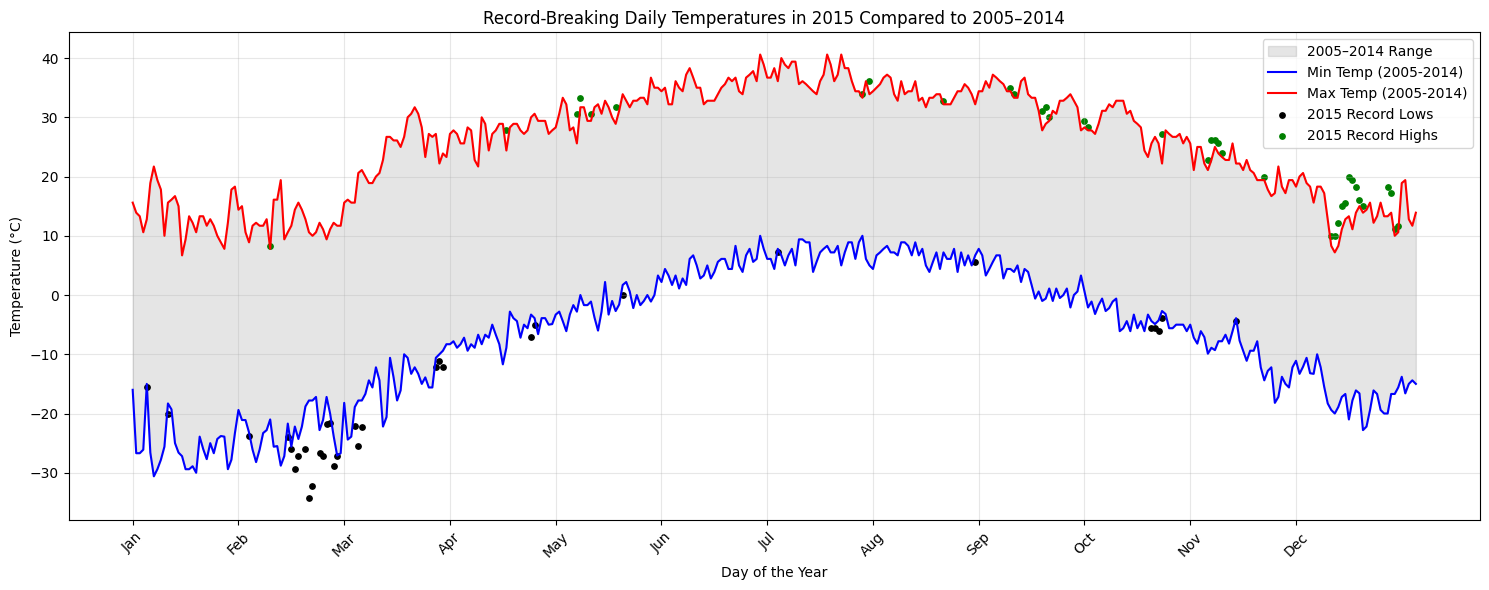

In [25]:
import matplotlib.pyplot as plt 
from calendar import month_abbr 

merged_min = pd.merge(min_temp_decade, min_temp_2015, on='Month-Day')
merged_max = pd.merge(max_temp_decade, max_temp_2015, on='Month-Day')

record_lows_2015 = merged_min[merged_min['MinTemp_2015'] < merged_min['MinTemp_2005_2014']]
record_highs_2015 = merged_max[merged_max['MaxTemp_2015'] > merged_max['MaxTemp_2005_2014']]

plt.figure(figsize=(15, 6))

plt.fill_between(
    min_temp_decade['Month-Day'], 
    min_temp_decade['MinTemp_2005_2014'], 
    max_temp_decade['MaxTemp_2005_2014'], 
    color='gray', 
    alpha=0.2, 
    label='2005–2014 Range'
)

plt.plot(min_temp_decade['Month-Day'], min_temp_decade['MinTemp_2005_2014'], label='Min Temp (2005-2014)', color='blue')
plt.plot(max_temp_decade['Month-Day'], max_temp_decade['MaxTemp_2005_2014'], label='Max Temp (2005-2014)', color='red')

plt.scatter(record_lows_2015['Month-Day'], record_lows_2015['MinTemp_2015'], s=15, color='black', label='2015 Record Lows')
plt.scatter(record_highs_2015['Month-Day'], record_highs_2015['MaxTemp_2015'], s=15, color='green', label='2015 Record Highs')

plt.xlabel('Day of the Year')
plt.ylabel('Temperature (°C)')
plt.title('Record-Breaking Daily Temperatures in 2015 Compared to 2005–2014')
plt.xticks(ticks=[i for i in range(0, 365, 30)][0:12], labels=month_abbr[1:13], rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(alpha=0.3)
plt.show()